Ref: https://mlabonne.github.io/blog/posts/2022_02_20_Graph_Convolution_Network.html

In [411]:
!pip install torch_geometric

import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sympy import *
import random

#%%
random.seed(0)
random.random()

torch.manual_seed(0)
torch.rand(4)

np.random.seed(0)
np.random.rand(4)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [412]:
from torch_geometric.datasets import KarateClub

# Import dataset from PyTorch Geometric
dataset = KarateClub()

# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [413]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [414]:
data = dataset[0]
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [415]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [416]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [417]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


Change class 3 to 1 and class 2 to 0

In [418]:
data.y[data.y==3] = 1
data.y[data.y==2] = 0

In [419]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [420]:
data.y.unsqueeze(1).shape

torch.Size([34, 1])

In [421]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [422]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


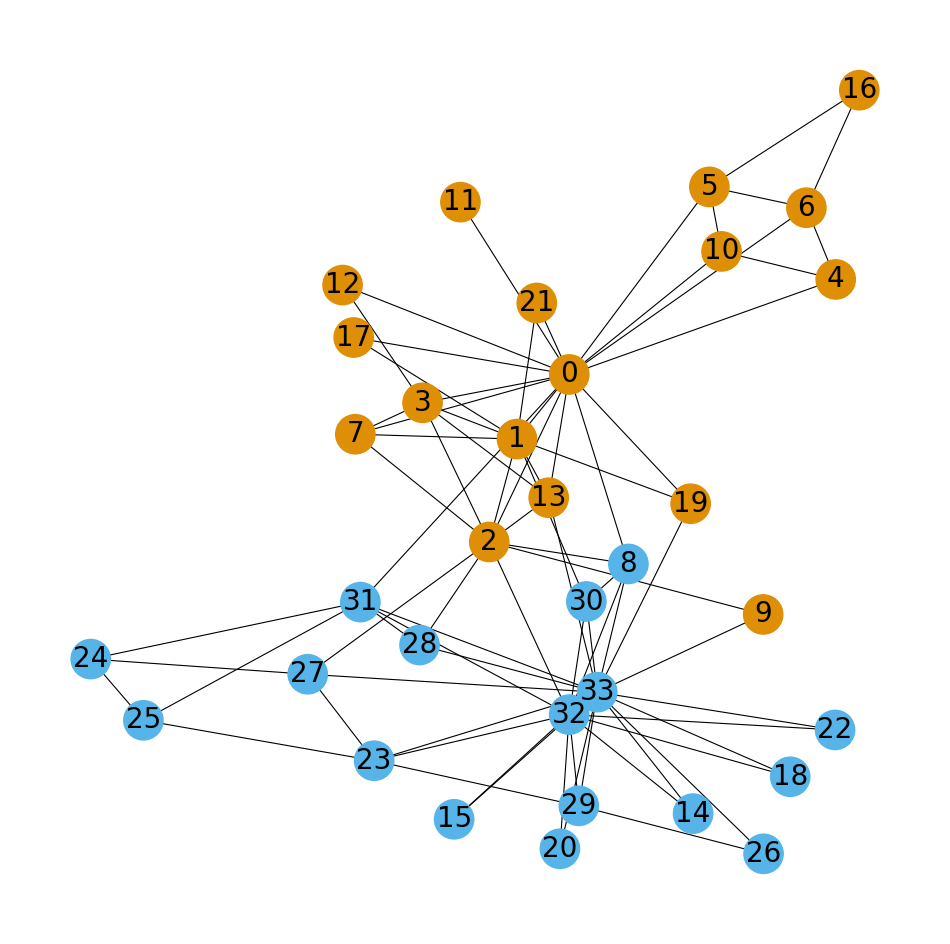

In [423]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
color_list = ['#56b4e9','#de8f05','#ece133','#cc78bc']
origin_color_outputs = []
for j in range(len(data.y)):
  origin_color_outputs.append(color_list[int(data.y[j])])
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=origin_color_outputs,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="black",
                font_size=20
                )
plt.show()

In [424]:
from torch.nn import Linear
from torch.nn import Sigmoid
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # self.gcn = GCNConv(dataset.num_features, 3)
        # self.out = Linear(dataset.num_classes, dataset.num_classes)
        # self.gcn = GCNConv(dataset.num_features, dataset.num_classes)
        self.FCL1 = Linear(dataset.num_features, 1, bias=False)
        self.sigmoid = Sigmoid()

    def forward(self, x, edge_index):
        # h = self.gcn(x, edge_index)#.relu()
        # h = A@x@weights
        temp = torch.from_numpy(A).float()@x
        h = self.FCL1(temp)
        z = self.sigmoid(h)
        # z = h
        # z = self.out(h)
        return h, z

model = GCN()
print(model)

GCN(
  (FCL1): Linear(in_features=34, out_features=1, bias=False)
  (sigmoid): Sigmoid()
)


In [425]:
W = []
W_peak = []
W_kron = []
for name, param in model.named_parameters():
    if param.requires_grad:
        W.append(param.data.detach().clone())
        W_kron.append(param.data.detach().clone())
        W_peak.append(param.data)
        print(name, param.numel())

FCL1.weight 34


In [426]:
def my_loss(output, target):
    loss_true = -sum(torch.from_numpy(target)*torch.log(output).squeeze(1))
    target_mis = 1-target # Wrong classification
    loss_mis = -sum(torch.from_numpy(target_mis)*torch.log(1-output).squeeze(1))
    loss = loss_true + loss_mis
    return loss

In [427]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
data.y.unsqueeze(1)
enc.fit(data.y.unsqueeze(1))
dummy_y = enc.transform(data.y.unsqueeze(1)).toarray()

In [428]:
# save initial weights
W_change = []
W_temp = []
for s in range(len(W)):
    W_temp.append(W_peak[s].detach().clone())
W_change.append(W_temp)

# criterion = torch.nn.CrossEntropyLoss()
lr = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Calculate accuracy
def accuracy(pred_y, y):
    return (1*(pred_y>0.5).squeeze(1) == y).sum() / len(y)

# Data for animations
losses = []
accuracies = []
outputs = []

# save initial data
model.eval()
with torch.no_grad():
    # Forward pass
    h, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = my_loss(z, data.y.numpy())

    # Calculate accuracy
    acc = accuracy(1*(z>0.5), data.y)

    losses.append(loss)
    accuracies.append(acc)
    outputs.append(1*(z>0.5))
model.train(True)

n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = my_loss(z, data.y.numpy())

    # Calculate accuracy
    acc = accuracy(z, data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store updated weight
    W_temp = []
    for s in range(len(W_peak)):
        W_temp.append(W_peak[s].detach().clone())
    W_change.append(W_temp)

    # Store data for animations
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(1*(z>0.5))

    # Print metrics every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch  10 | Loss: 3.99 | Acc: 97.06%
Epoch  20 | Loss: 2.80 | Acc: 97.06%
Epoch  30 | Loss: 2.26 | Acc: 97.06%
Epoch  40 | Loss: 1.92 | Acc: 97.06%
Epoch  50 | Loss: 1.68 | Acc: 97.06%
Epoch  60 | Loss: 1.50 | Acc: 100.00%
Epoch  70 | Loss: 1.36 | Acc: 100.00%
Epoch  80 | Loss: 1.24 | Acc: 100.00%
Epoch  90 | Loss: 1.14 | Acc: 100.00%
Epoch 100 | Loss: 1.06 | Acc: 100.00%


In [429]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    color_list = ['#56b4e9','#de8f05','#ece133','#cc78bc']
    color_outputs = []
    for j in range(len(outputs[i])):
      color_outputs.append(color_list[int(outputs[i][j])])
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=color_outputs,
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="black",
                    font_size=20
                    )
    plt.title(f'Iteration {i} \n Training loss: {losses[i]:.2f} | Accuracy: {accuracies[i]*100:.2f}%',
              fontsize=30, pad=20)

In [430]:
fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, n_epochs+1, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


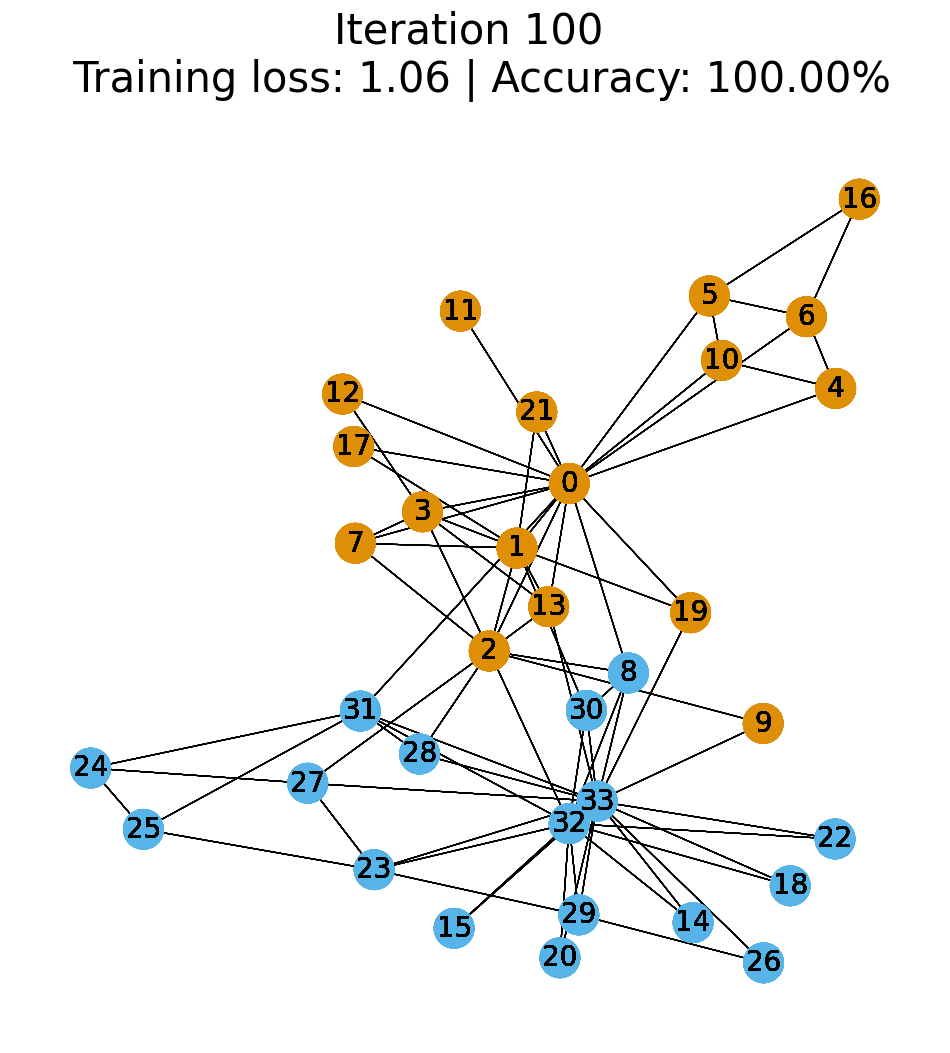

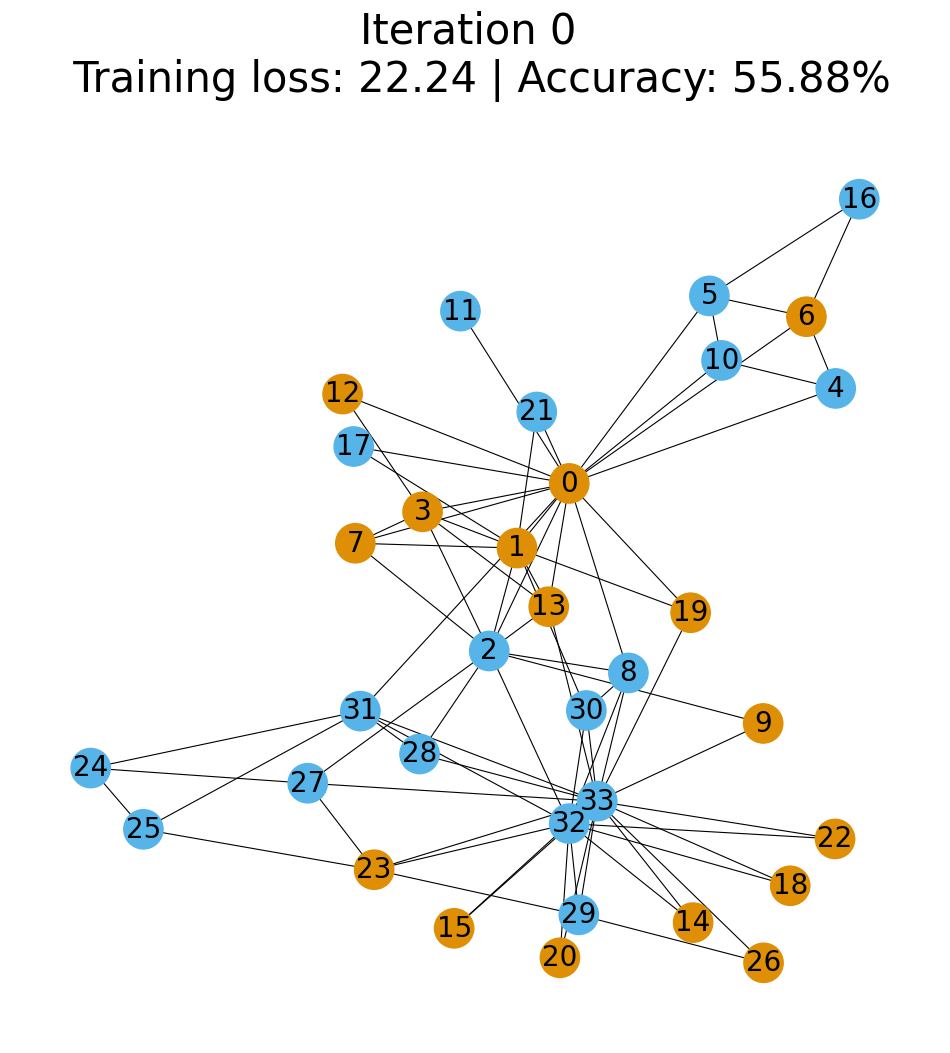

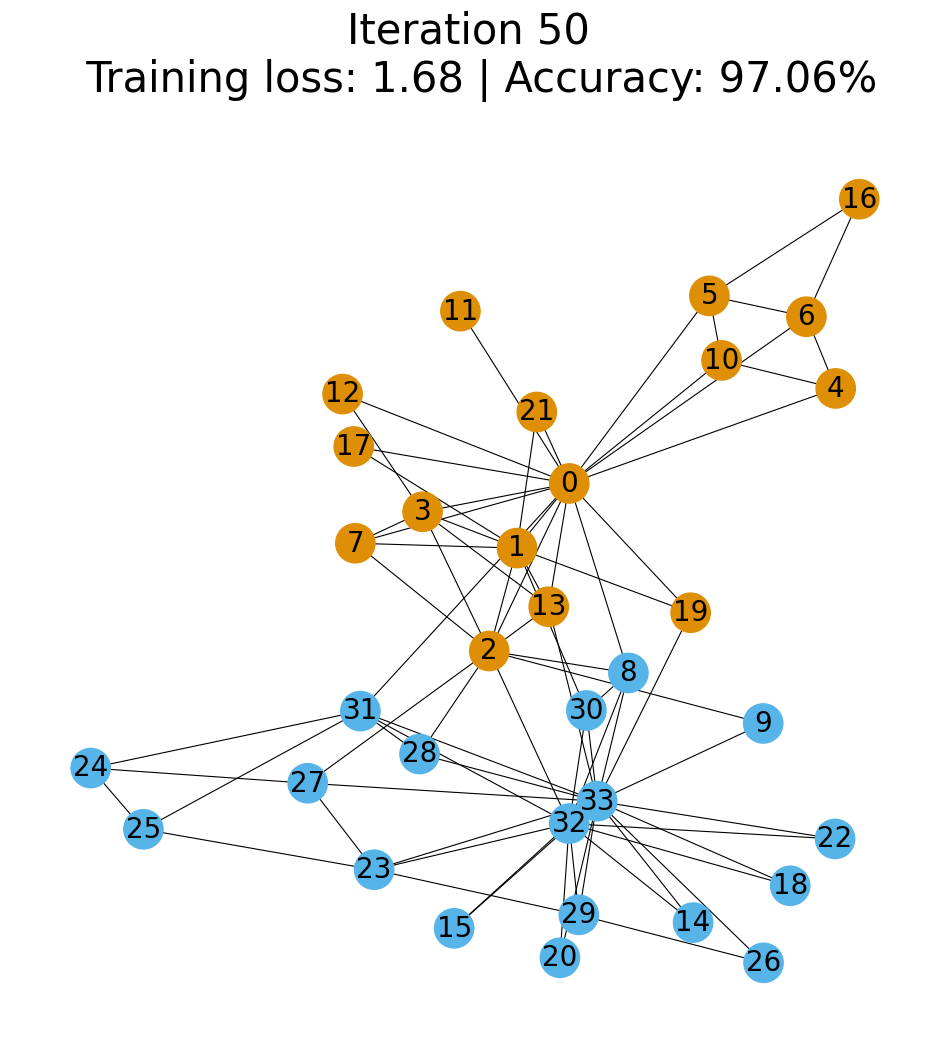

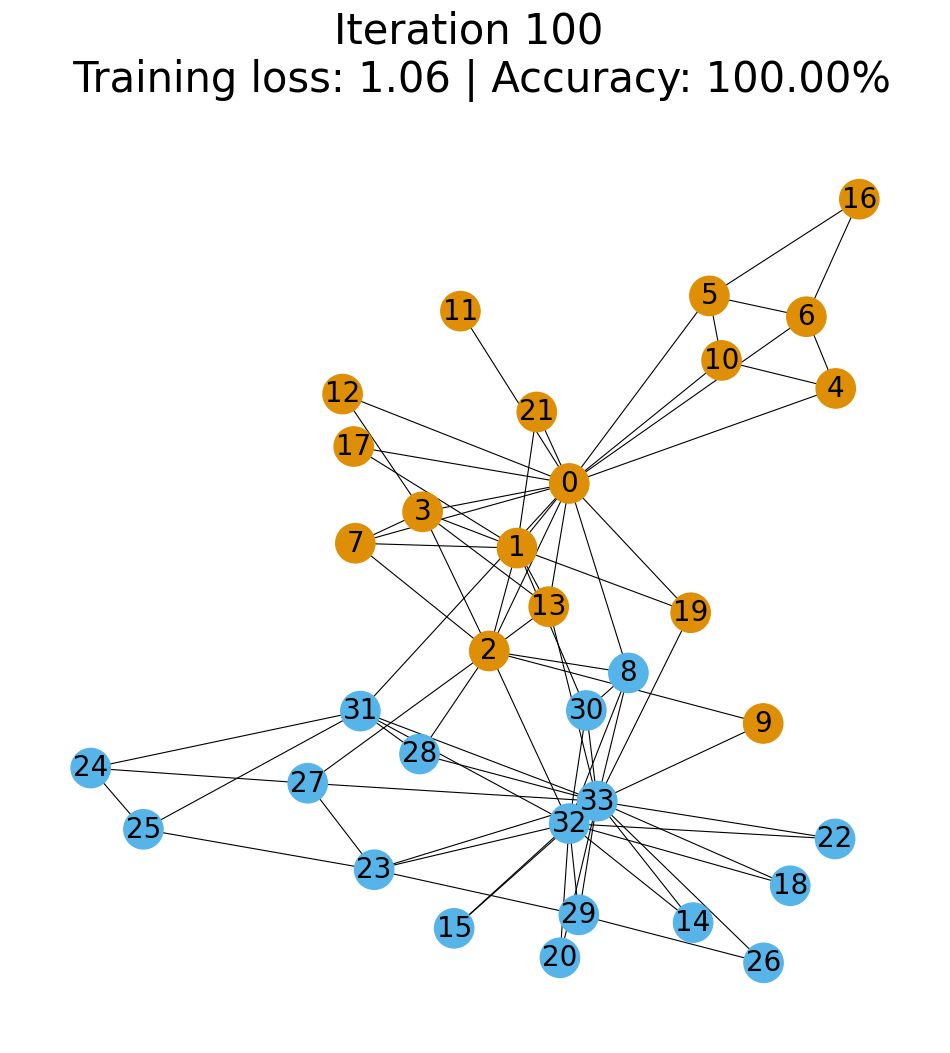

In [431]:
for i in range(0,n_epochs+1,50):
  fig = plt.figure(figsize=(12, 12))
  plt.axis('off')
  animate(i)
  plt.show()

In [432]:
def myKron(a,b):
   na_r = np.shape(a)[0]
   na_c = np.shape(a)[1]
   nb_r = np.shape(b)[0]
   nb_c = np.shape(b)[1]
   return (a[:, None, :, None]*b[None, :, None, :]).reshape(na_r*nb_r,na_c*nb_c)

In [433]:
def unitvector( dimension, position ):
   e = np.zeros( (dimension, 1) )
   e[position-1] = 1
   return e

#test
#ee = unitvector(3, 1)
#ef = unitvector(2, 2)
#E = ee*np.transpose(ef)

def ElementaryMatrix( row, col, position1, position2 ):
   E = unitvector(row, position1)*np.transpose(unitvector(col, position2))
   return E

#test
#E2 = ElementaryMatrix(3,2,1,2)

def PermutationMatrix( row, col ):
    U = np.zeros( (row*col, row*col) )
    for i in range(0, row):
        for j in range(0, col):
            U = U + myKron(ElementaryMatrix(row,col,i+1,j+1), ElementaryMatrix(col,row,j+1,i+1))
    return U

#test
#U2 = PermutationMatrix(2,3)

def PermutationRelatedMatrix( row, col ):
    U = np.zeros( (row*row, col*col) )
    for i in range(0, row):
        for j in range(0, col):
            U = U + myKron(ElementaryMatrix(row,col,i+1,j+1), ElementaryMatrix(row,col,i+1,j+1))
    return U

In [434]:
def my_sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [435]:
def My_GCN(x, A, W):
  z = my_sigmoid(A@x.numpy()@W.numpy())
  return z

In [436]:
def my_weight_update(output, target, A, H0):
    n = np.shape(target)[0]
    n1 = np.shape(target)[1]
    first_flag = 1
    for i in range(0,n,1):
        for j in range(0,n1,1):
            term1 = target[i,j] - output[i,j]
            term2 = np.kron(np.identity(n),A[i,:]@H0.numpy())
            term3 = PermutationRelatedMatrix(n,n1)@np.kron(np.identity(n1),unitvector(n1,j+1)) # position of the unit vector starts from 1
            if first_flag:
                g = term1*(term2@term3)
                first_flag = 0
            else:
                g = g+term1*(term2@term3)
    return -g

In [437]:
def my_feature_sensitivity(output, target, A, W):
    n = np.shape(target)[0]
    n0 = np.shape(W)[0]
    n1 = np.shape(target)[1]
    U_bar_nn0 = PermutationRelatedMatrix(n,n0)
    first_flag = 1
    for i in range(0,n,1):
        for j in range(0,n1,1):
            term1 = target[i,j] - output[i,j]
            term2 = myKron(np.identity(n),np.expand_dims(A[i,:],0))
            term3 = U_bar_nn0@myKron(np.identity(n0),np.expand_dims(W[:,j],1))
            if first_flag:
                g = term1*(term2@term3)
                first_flag = 0
            else:
                g = g+term1*(term2@term3)
    return -g

In [438]:
L2X_sens = []
W_change_2 = []
W_temp = []
for s in range(len(W)):
    W_temp.append(W_kron[s])
W_change_2.append(W_temp)

# criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Data for animations
losses_2 = []
accuracies_2 = []
outputs_2 = []

# save initial data
z = My_GCN(data.x, A, W_kron[0].T)
loss = my_loss(torch.from_numpy(z), data.y.numpy())
acc = accuracy(torch.from_numpy(z), data.y)
losses_2.append(loss)
accuracies_2.append(acc)
outputs_2.append(1*(torch.from_numpy(z)>0.5))
model.eval()

# Training loop
for epoch in range(n_epochs):
    # Clear gradients
    # optimizer.zero_grad()

    # Forward pass
    # h, z = model(data.x, data.edge_index)
    z = My_GCN(data.x, A, W_kron[0].T)

    # Calculate loss function
    loss = my_loss(torch.from_numpy(z), data.y.numpy())

    # Calculate accuracy
    acc = accuracy(torch.from_numpy(z), data.y)

    # Compute gradients
    # loss.backward()
    g = my_weight_update(z, data.y.unsqueeze(1).numpy(), A, data.x)

    # Compute loss sensitivity to features
    L2X = my_feature_sensitivity(z, data.y.unsqueeze(1).numpy(), A, W_kron[0].T)
    L2X_sens.append(L2X)

    # Tune parameters
    # optimizer.step()

    # Update weight
    for s in range(len(W_kron)):
        W_kron[s] = W_kron[s] - (lr*g).T
    # Update weight
    # W1 = W1 - (lr*g).T
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print(name, param.numel())
    # param.data = W1.float()

    W_temp = []
    for s in range(len(W_kron)):
        W_temp.append(W_kron[s])
    W_change_2.append(W_temp)

    # Store data for animations
    losses_2.append(loss)
    accuracies_2.append(acc)
    outputs_2.append(1*(torch.from_numpy(z)>0.5))

    # Print metrics every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch  10 | Loss: 3.99 | Acc: 97.06%
Epoch  20 | Loss: 2.80 | Acc: 97.06%
Epoch  30 | Loss: 2.26 | Acc: 97.06%
Epoch  40 | Loss: 1.92 | Acc: 97.06%
Epoch  50 | Loss: 1.68 | Acc: 97.06%
Epoch  60 | Loss: 1.50 | Acc: 100.00%
Epoch  70 | Loss: 1.36 | Acc: 100.00%
Epoch  80 | Loss: 1.24 | Acc: 100.00%
Epoch  90 | Loss: 1.14 | Acc: 100.00%
Epoch 100 | Loss: 1.06 | Acc: 100.00%


In [439]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate_2(i):
    G = to_networkx(data, to_undirected=True)
    color_list = ['#56b4e9','#de8f05','#ece133','#cc78bc']
    color_outputs = []
    for j in range(len(outputs_2[i])):
      color_outputs.append(color_list[int(outputs_2[i][j])])
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=color_outputs,
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="black",
                    font_size=20
                    )
    plt.title(f'Iteration {i} \n Training loss: {losses_2[i]:.2f} | Accuracy: {accuracies_2[i]*100:.2f}%',
              fontsize=30, pad=20)

In [440]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    color_list = ['#56b4e9','#de8f05','#ece133','#cc78bc']
    color_outputs = []
    for j in range(len(outputs[i])):
      color_outputs.append(color_list[int(outputs[i][j])])
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=color_outputs,
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="black",
                    font_size=20
                    )
    plt.title(f'Iteration {i} \n Training loss: {losses[i]:.2f} | Accuracy: {accuracies[i]*100:.2f}%',
              fontsize=30, pad=20)

In [441]:
fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate_2, \
            np.arange(0, n_epochs+1, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


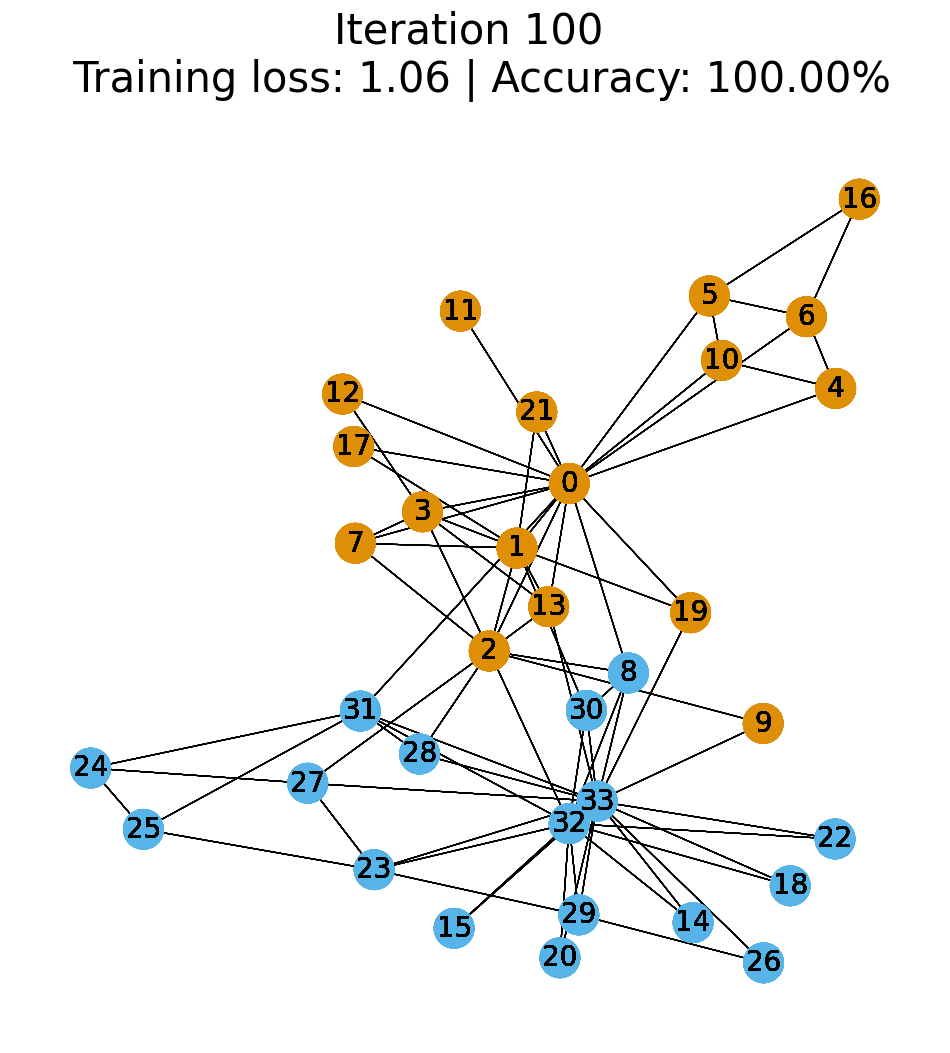

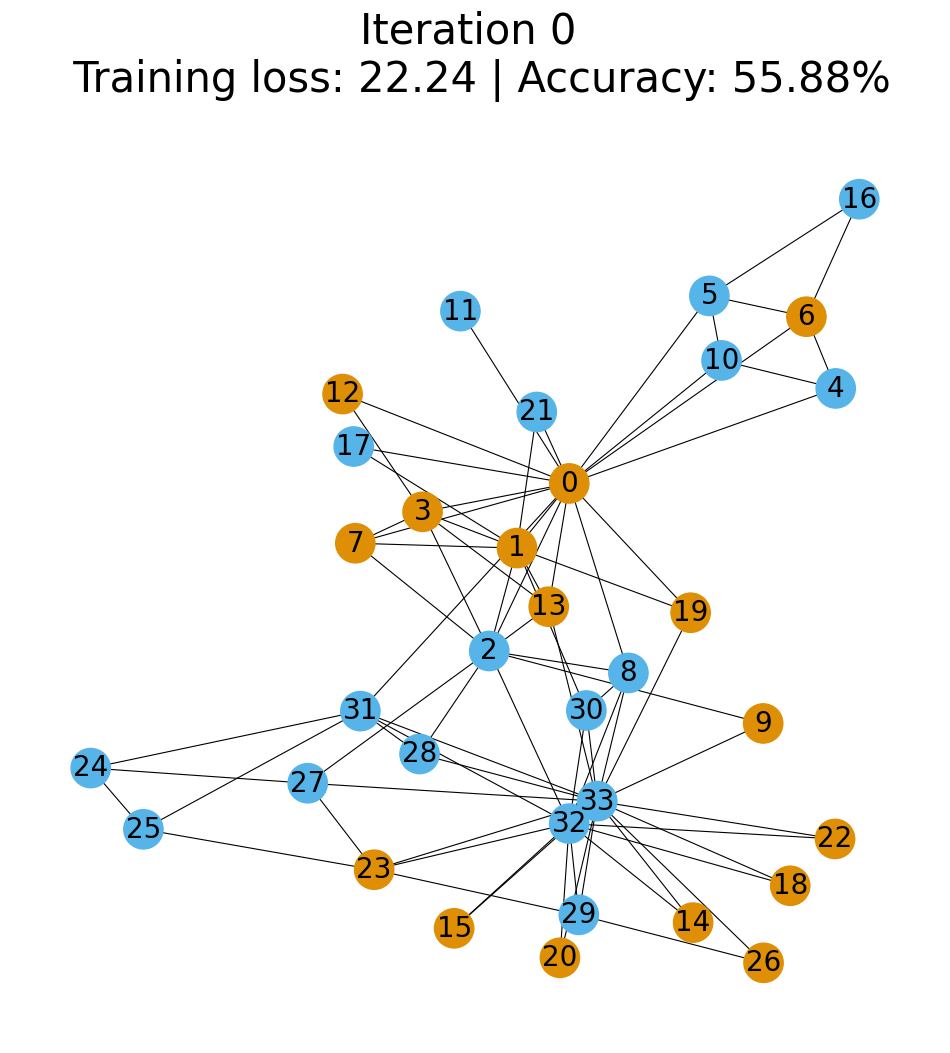

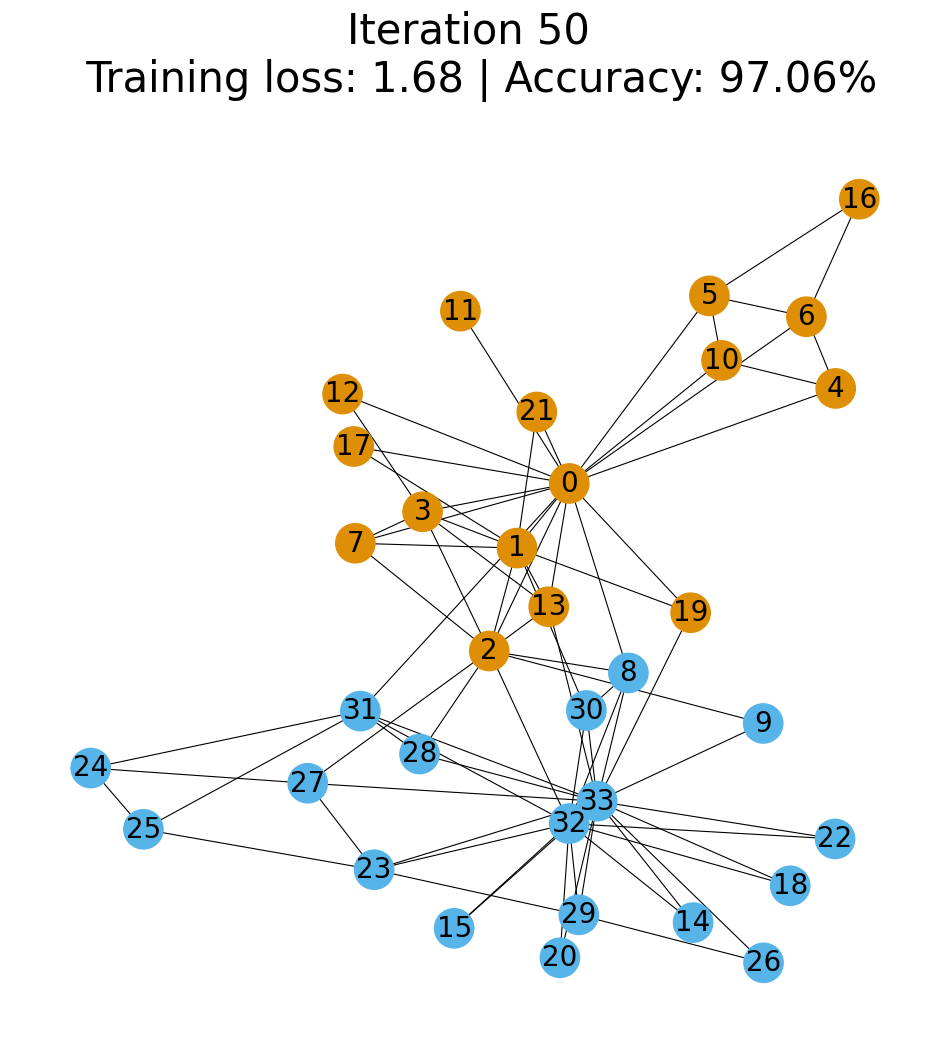

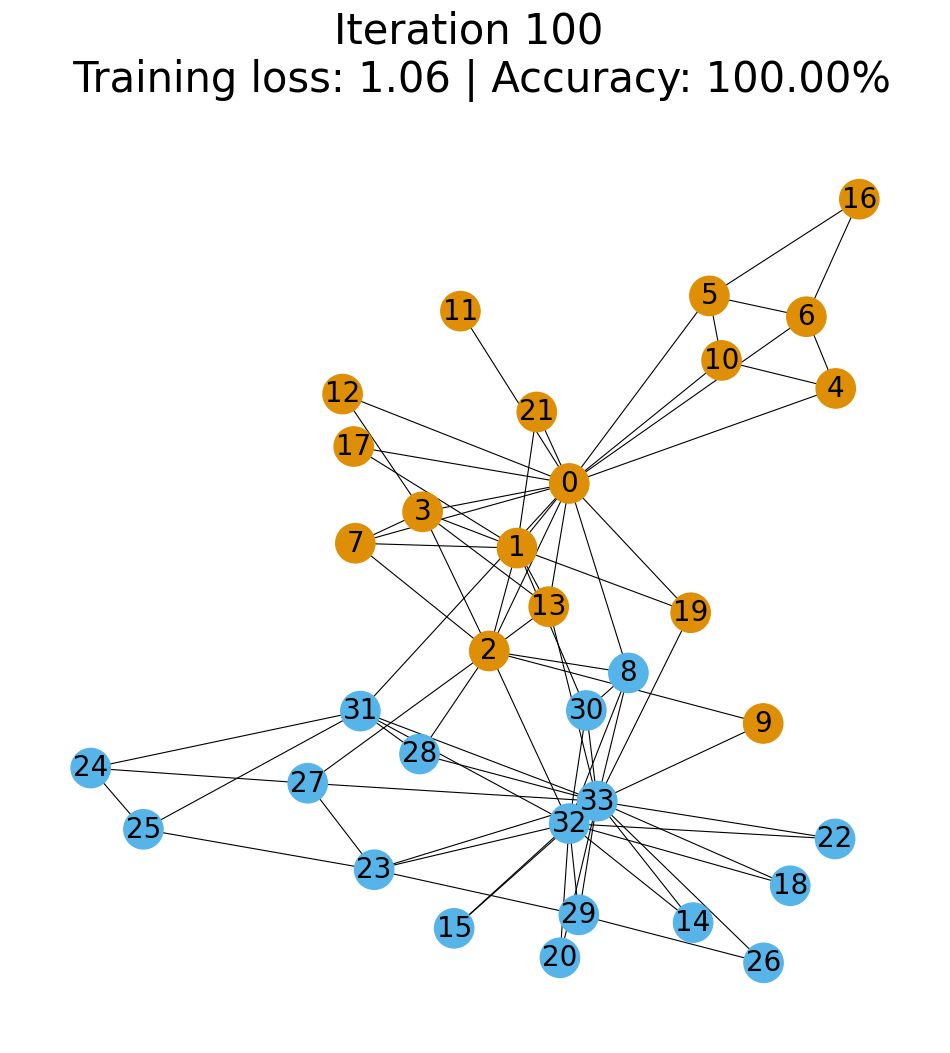

In [442]:
for i in range(0,n_epochs+1,50):
  fig = plt.figure(figsize=(12, 12))
  plt.axis('off')
  animate_2(i)
  plt.show()

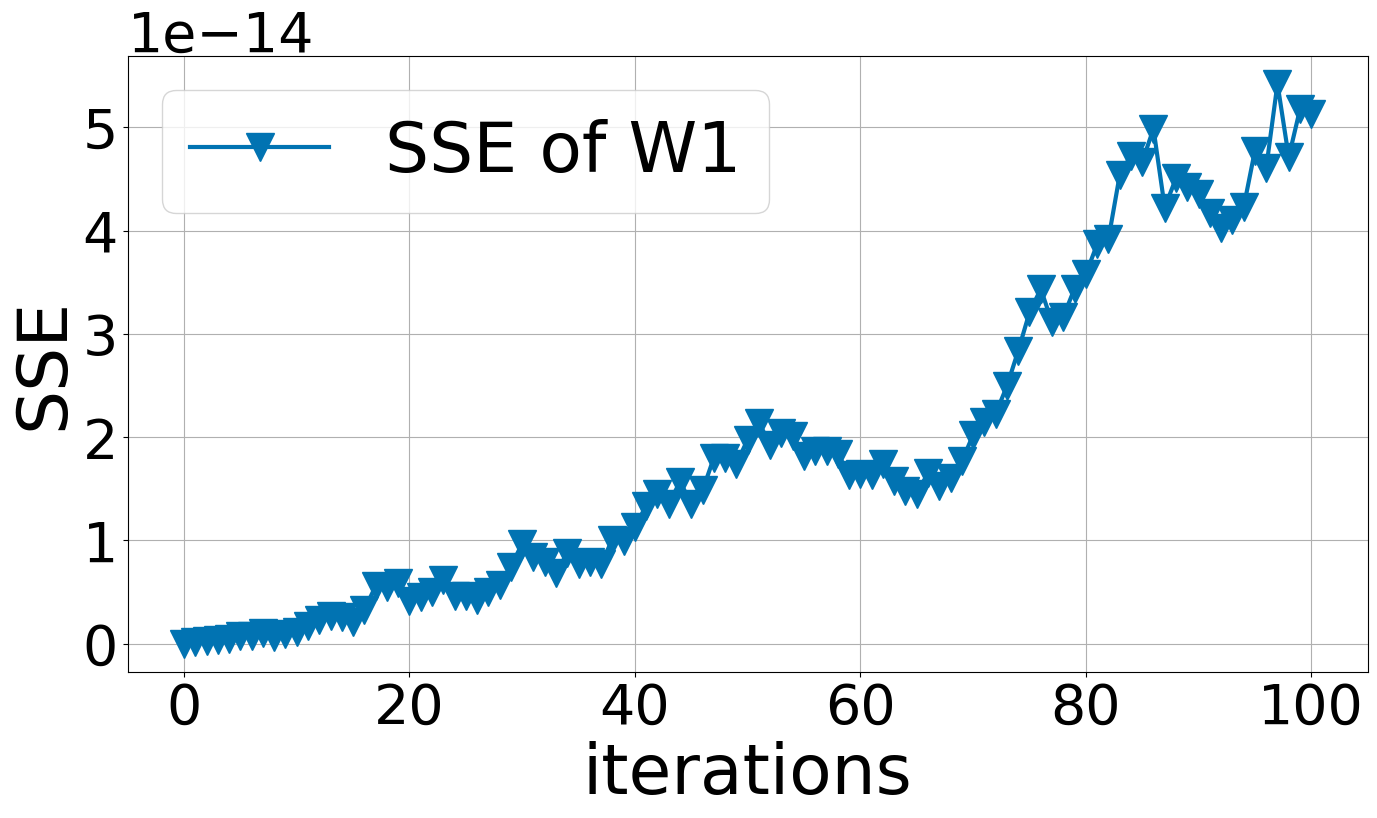

In [443]:
W_dif = []
for i in range(n_epochs+1):
    W_temp = []
    for s in range(len(W)):
        W_temp.append(torch.mean((W_change[i][s]-W_change_2[i][s])**2))
    W_dif.append(W_temp)

#%%
import itertools
import matplotlib.pyplot as plt

plt.rcParams["xtick.labelsize"] = 40
plt.rcParams["ytick.labelsize"] = 40
plt.figure(figsize=(16,8))

# ['#0173b2',
#  '#de8f05',
#  '#029e73',
#  '#d55e00',
#  '#cc78bc',
#  '#ca9161',
#  '#fbafe4',
#  '#949494',
#  '#ece133',
#  '#56b4e9']

color = itertools.cycle(('#0173b2','#de8f05','#029e73','#d55e00','#cc78bc','#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9'))
marker = itertools.cycle(('v', 'P', '^', 'o', '<', '*', '>',))
for s in range(len(W)):
    plt.plot(np.array(list(range(n_epochs+1))), np.array(W_dif).T[s], color=next(color),linewidth=3, marker=next(marker), markersize=20, label='SSE of W' + str(s+1))
# Sum of Squared Errors
# plt.title('Sum of Squared Errors (SSE) between automatic differentiation \nand our method using Kronecker product', fontsize=30)
plt.xlabel('iterations', fontsize=50)
plt.ylabel('SSE', fontsize=50)
plt.legend(loc="best", fontsize=50)
plt.grid()
plt.rcParams.update(plt.rcParamsDefault)
plt.show()

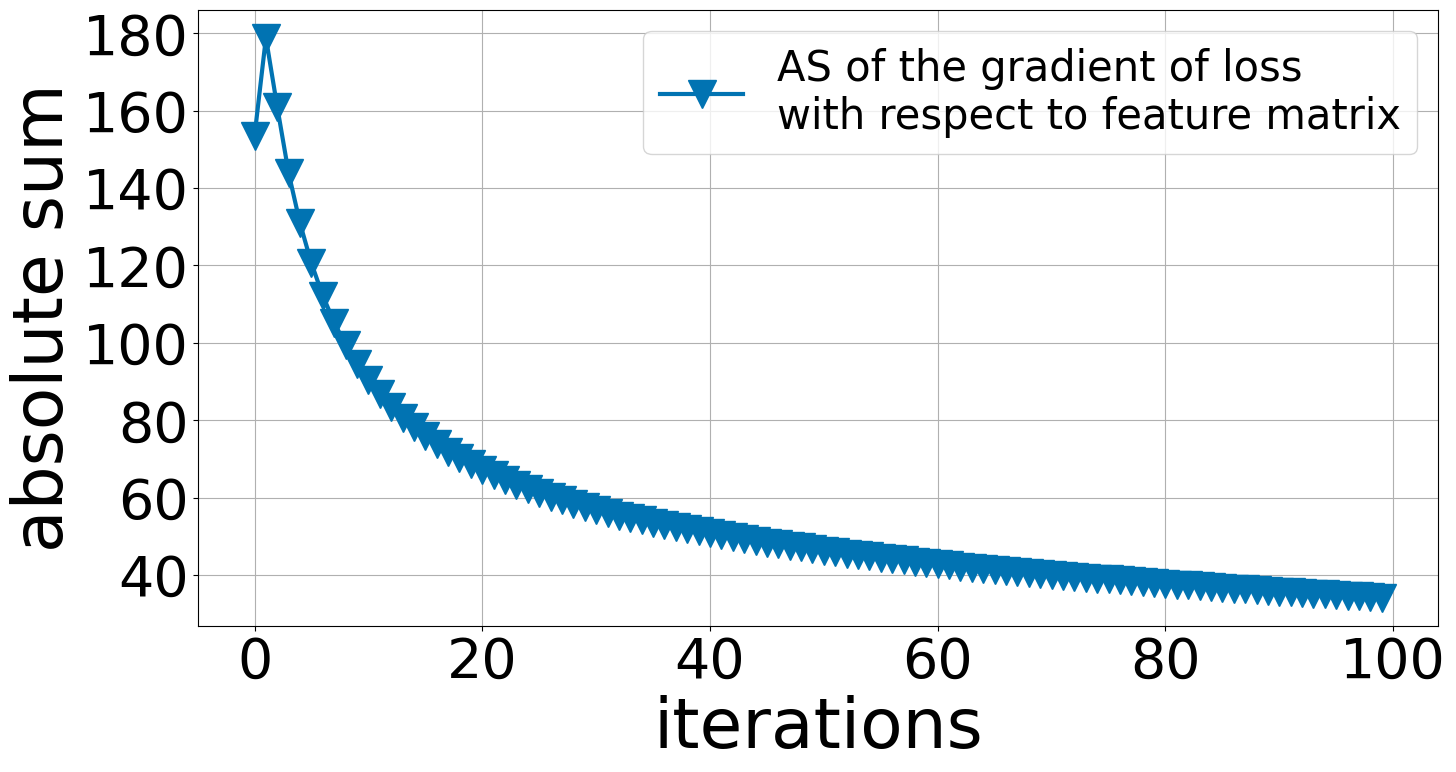

In [444]:
L2X_sum = []
for i in range(n_epochs):
    L2X_sum.append(np.sum(abs(L2X_sens[i])))

#%%
import itertools
import matplotlib.pyplot as plt

plt.rcParams["xtick.labelsize"] = 40
plt.rcParams["ytick.labelsize"] = 40
plt.figure(figsize=(16,8))

# ['#0173b2',
#  '#de8f05',
#  '#029e73',
#  '#d55e00',
#  '#cc78bc',
#  '#ca9161',
#  '#fbafe4',
#  '#949494',
#  '#ece133',
#  '#56b4e9']

color = itertools.cycle(('#0173b2','#de8f05','#029e73','#d55e00','#cc78bc','#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9'))
marker = itertools.cycle(('v', 'P', '^', 'o', '<', '*', '>',))
plt.plot(np.array(list(range(n_epochs))), L2X_sum, color=next(color),linewidth=3, marker=next(marker), markersize=20, label='AS of the gradient of loss \nwith respect to feature matrix')
# Sum of Squared Errors
# plt.title('Sum of Squared Errors (SSE) between automatic differentiation \nand our method using Kronecker product', fontsize=30)
plt.xlabel('iterations', fontsize=50)
plt.ylabel('absolute sum', fontsize=50)
plt.legend(loc="best", fontsize=30)
plt.grid()
plt.rcParams.update(plt.rcParamsDefault)
plt.show()

In [445]:
print(data.x)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [446]:
L2X_sens[0]

array([[ 0.39668767, -0.27618724,  0.02040648, ...,  0.96460599,
         0.60122037, -0.88533835],
       [ 0.22228454, -0.15476194,  0.0114348 , ...,  0.54051844,
         0.33689476, -0.4961007 ],
       [ 0.0623132 , -0.04338454,  0.00320553, ...,  0.15152396,
         0.09444197, -0.1390723 ],
       ...,
       [-0.10451933,  0.07276986, -0.0053767 , ..., -0.25415454,
        -0.15840964,  0.23326909],
       [-0.3093046 ,  0.21534822, -0.0159113 , ..., -0.75212084,
        -0.46878247,  0.69031442],
       [-0.35473913,  0.24698126, -0.01824855, ..., -0.86260179,
        -0.53764312,  0.79171647]])

In [447]:
np.sum(abs(L2X_sens[0]))

153.38737153945792

In [448]:
np.sum(abs(L2X_sens[49]))

46.6925413398948

In [449]:
np.sum(abs(L2X_sens[-1]))

34.11257925252799

In [450]:
W_kron[0].size()

torch.Size([1, 34])

In [451]:
np.expand_dims(W_kron[0].T[:,0],1)

array([[ 2.91261990e+00],
       [ 1.93296889e+00],
       [ 1.90274787e+00],
       [ 1.56879990e+00],
       [ 5.88274633e-01],
       [ 1.65225640e+00],
       [ 1.60109943e+00],
       [ 7.87208768e-01],
       [-3.50786419e-01],
       [ 3.39804028e-01],
       [ 5.78851250e-01],
       [ 8.38594958e-02],
       [ 2.57074818e-01],
       [ 8.59956074e-01],
       [-2.67413264e-01],
       [-2.25828586e-01],
       [ 5.37380199e-01],
       [ 3.34310080e-01],
       [-1.86441766e-01],
       [ 2.56367692e-01],
       [-1.78790044e-01],
       [ 2.10046695e-01],
       [ 4.14056529e-03],
       [-1.65199371e+00],
       [-1.65245554e+00],
       [-1.22990612e+00],
       [-2.70596629e-01],
       [-2.42310764e-01],
       [-3.95910721e-04],
       [-1.40314195e+00],
       [-1.78482831e+00],
       [-2.66743599e+00],
       [-3.98256600e+00],
       [-1.31130691e+00]])

In [452]:
U_bar_nn0 = PermutationRelatedMatrix(34,34)

In [453]:
temp1 = U_bar_nn0@myKron(np.identity(34),np.expand_dims(W_kron[0].T[:,0],1))

In [454]:
myKron(np.identity(34),np.expand_dims(A[0,:],0))

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [455]:
myKron(np.identity(34),np.expand_dims(A[0,:],0))@temp1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.9126199 ,  1.93296889,  1.90274787, ..., -2.66743599,
        -3.982566  , -1.31130691],
       [ 2.9126199 ,  1.93296889,  1.90274787, ..., -2.66743599,
        -3.982566  , -1.31130691],
       ...,
       [ 2.9126199 ,  1.93296889,  1.90274787, ..., -2.66743599,
        -3.982566  , -1.31130691],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [456]:
np.expand_dims((W_kron[0].T)[0],1).size()

TypeError: 'int' object is not callable